# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: Scott Scheraga
***

This assignment is due on Canvas by **11.59 PM on Wednesday, March 18**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course.

## Part 1: Lasso and Ridge regression - 40 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms across a few different data sets.

You will be using the following data sets:

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [164]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. [15 Pts] Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model for each of the 3 data sets(A, B and C) using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$ in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$ for all three datasets in the same graph.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error in case of each dataset. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0? (more that 50 percent. Entires= Weight coefficients
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

------------------- PART (A)---------------------------
[16, 4, 0, 0, 0]
[9, 7, 7, 7, 6]
[10, 9, 7, 4, 4]


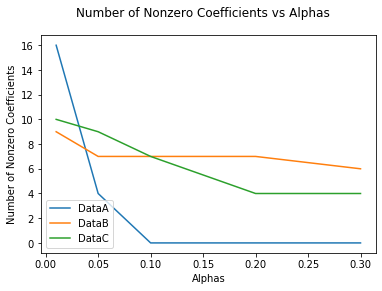

------------------- PART (B)---------------------------
𝜆 that yields the minimum number of non-zero coefficients, w_b's:
Data A:  0.1
Data B:  0.3
Data C:  0.2
Quantity of non-zero coefficients for those cases:
Data A: 0
Data B: 6
Data C: 4
------------------- PART (C)---------------------------
[0.9669428987430119, 0.9382220492141468, 0.9383769914330924, 0.9383769914330924, 0.9383769914330924]
[0.018247756874594772, 0.05914657756834905, 0.08137414855313153, 0.1416183547772921, 0.185557166995104]
[1.8873233838343155, 1.8757979319577198, 1.868383313882819, 1.8701642761804542, 1.8599121741570128]


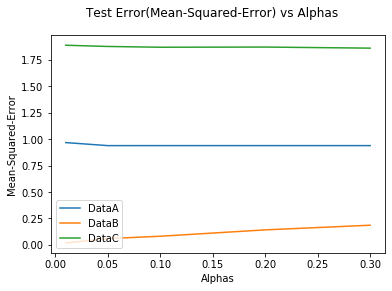

------------------- PART (D)---------------------------
𝜆 that yields the minimum test error, w_d's:
Data A:  0.01
Data B:  0.01
Data C:  0.01
Quantity of non-zero coefficients for those cases:
Data A: 16
Data B: 9
Data C: 10
------------------- PART (E)---------------------------


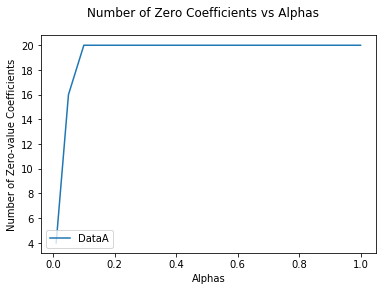

After Lambda=0.1, all of the coefficients become Zero. The coefficients stay zero as Lambda increases further 


In [165]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib.pylab import plt
import math

class Lasso:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        self.fit()    
        
    def fit(self,zeroesTF=False):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''     
        Lmodel = linear_model.Lasso(self.gamma)
        Lmodel.fit(self.data.train_x,self.data.train_y)
        
        #rint(Lmodel.coef_)
       #print("nonzero weights count= ", np.count_nonzero(Lmodel.coef_))
        num_nonzero_coeff=np.count_nonzero(Lmodel.coef_)
        num_zero_coeff=np.size(Lmodel.coef_)-num_nonzero_coeff
        
        #Lmodel.predict(self.data.test_x)
        #print(Lmodel.predict(self.data.test_x))
        
        #From https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx
        mean_squared_err=mean_squared_error(self.data.test_y, Lmodel.predict(self.data.test_x))
        #mean_squared_err=np.sqrt(np.mean((self.data.test_y-Lmodel.predict(self.data.test_x))**2))
        
        #print("mse=", mean_squared_err)
        
        #print(Lmodel.intercept_)
        #,mean_squared_err;
        if zeroesTF==False:
            return num_nonzero_coeff,mean_squared_err
        else:
            return num_nonzero_coeff,mean_squared_err,num_zero_coeff
data_sets = {'A': data_a, 'B': data_b, 'C': data_c}
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]

print('------------------- PART (A)---------------------------')

nzcA=[]
nzcB=[]
nzcC=[]

for i in range(0,np.size(alphas)):
    a1= Lasso(alphas[i],data_a)
    a,j= a1.fit()
    nzcA.append(a)
for i in range(0,np.size(alphas)):
    a2= Lasso(alphas[i],data_b)
    a,j= a2.fit()
    nzcB.append(a)
for i in range(0,np.size(alphas)):
    a3= Lasso(alphas[i],data_c)
    a,j= a3.fit()
    nzcC.append(a)

print(nzcA)
print(nzcB)
print(nzcC)

plt.plot(alphas,nzcA,label="DataA")
plt.plot(alphas,nzcB,label="DataB")
plt.plot(alphas,nzcC,label="DataC")     
plt.legend(loc="lower left")
plt.ylabel('Number of Nonzero Coefficients')
plt.xlabel('Alphas')
plt.suptitle('Number of Nonzero Coefficients vs Alphas')
plt.show() 


print('------------------- PART (B)---------------------------')

minvalA= min(nzcA)
minvalB= min(nzcB)
minvalC= min(nzcC)
minindexA=0
minindexB=0
minindexC=0

#find and save the index for those lowest values
for i in range(0,np.size(nzcA)):
    if minvalA==nzcA[i]:
        minindexA=i
        break
for i in range(0,np.size(nzcB)):
    if minvalB==nzcB[i]:
        minindexB=i
        break
for i in range(0,np.size(nzcC)):
    if minvalC==nzcC[i]:
        minindexC=i
        break
        

        
w_ba=alphas[minindexA]
w_bb=alphas[minindexB]
w_bc=alphas[minindexC]

#print("Min indexes")
#print(minindexA)
#print(minindexB)
#print(minindexC)
print("𝜆 that yields the minimum number of non-zero coefficients, w_b's:")
print("Data A: ",w_ba)
print("Data B: ",w_bb)
print("Data C: ",w_bc)

print("Quantity of non-zero coefficients for those cases:")
print("Data A:",minvalA)
print("Data B:",minvalB)
print("Data C:",minvalC)


print('------------------- PART (C)---------------------------')
mteA=[]
mteB=[]
mteC=[]

for i in range(0,np.size(alphas)):
    a1= Lasso(alphas[i],data_a)
    a,j= a1.fit()
    mteA.append(j)
for i in range(0,np.size(alphas)):
    a2= Lasso(alphas[i],data_b)
    a,j= a2.fit()
    mteB.append(j)
for i in range(0,np.size(alphas)):
    a3= Lasso(alphas[i],data_c)
    a,j= a3.fit()
    mteC.append(j)

print(mteA)
print(mteB)
print(mteC)

plt.plot(alphas,mteA,label="DataA")
plt.plot(alphas,mteB,label="DataB")
plt.plot(alphas,mteC,label="DataC")     
plt.legend(loc="lower left")
plt.ylabel('Mean-Squared-Error')
plt.xlabel('Alphas')
plt.suptitle('Test Error(Mean-Squared-Error) vs Alphas')
plt.show() 

print('------------------- PART (D)---------------------------')
minvalA2= min(mteA)
minvalB2= min(mteB)
minvalC2= min(mteC)
minindexA2=0
minindexB2=0
minindexC2=0


for i in range(0,np.size(mteA)):
    if minvalA==mteA[i]:
        minindexA2=i
        break
for i in range(0,np.size(mteB)):
    if minvalB==mteB[i]:
        minindexB2=i
        break
for i in range(0,np.size(mteC)):
    if minvalC==mteC[i]:
        minindexC2=i
        break
             
w_da=alphas[minindexA2]
w_db=alphas[minindexB2]
w_dc=alphas[minindexC2]
print("𝜆 that yields the minimum test error, w_d's:")
print("Data A: ",w_da)
print("Data B: ",w_db)
print("Data C: ",w_dc)

print("Quantity of non-zero coefficients for those cases:")
print("Data A:",nzcA[minindexA2])
print("Data B:",nzcB[minindexB2])
print("Data C:",nzcC[minindexC2])

print('------------------- PART (E)---------------------------')
zcA=[]
alphas2 =[0.01, 0.05, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#print(alphas2)
for i in range(0,np.size(alphas2)):
    #print (i)
    a1= Lasso(alphas2[i],data_a)
    a,j,b= a1.fit(True)
    #print(b)
    zcA.append(b)


#print(zcA)
plt.plot(alphas2,zcA,label="DataA")   
plt.legend(loc="lower left")
plt.ylabel('Number of Zero-value Coefficients')
plt.xlabel('Alphas')
plt.suptitle('Number of Zero Coefficients vs Alphas')
plt.show() 

print("After Lambda=0.1, all of the coefficients become Zero. The coefficients stay zero as Lambda increases further ")


------------------- PART (A)---------------------------
[20, 20, 20, 20, 20]
[9, 9, 9, 9, 9]
[10, 10, 10, 10, 10]


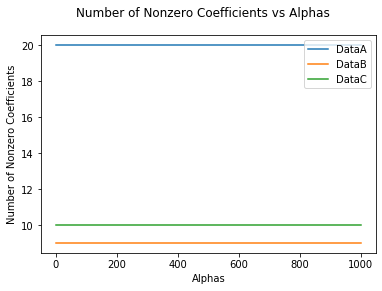

------------------- PART (B)---------------------------
𝜆 that yields the minimum number of non-zero coefficients, w_b's:
Data A:  1
Data B:  1
Data C:  1
Quantity of non-zero coefficients for those cases:
Data A: 20
Data B: 9
Data C: 10
------------------- PART (C)---------------------------
[0.9797121269462704, 0.9764085516804302, 0.9734829302281564, 0.9686796996006721, 0.9519096320097676]
[0.0036802254541537607, 0.03971462323639101, 0.04968027530949831, 0.06393518128301373, 0.1192109436729029]
[1.8914788719289497, 1.8874768665601396, 1.8843628251964846, 1.8797428064480364, 1.86611748037261]


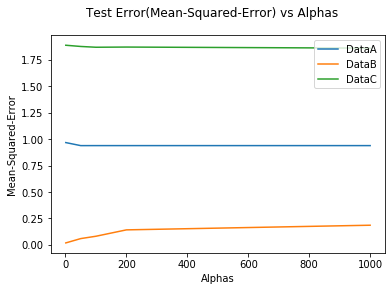

------------------- PART (D)---------------------------
𝜆 that yields the minimum test error, w_d's:
Data A:  1
Data B:  1
Data C:  1
Quantity of non-zero coefficients for those cases:
Data A: 16
Data B: 9
Data C: 10
------------------- PART (E)---------------------------


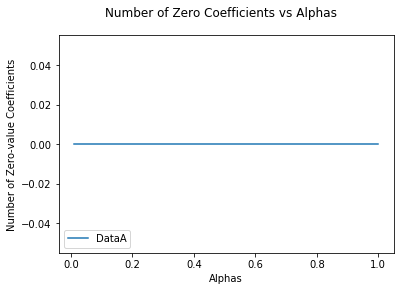

Regardless of the Lambda used, the number of Zero-valued coefficients never decreases, and it does not appear that the quantitity will ever reach zero. 


In [166]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

class Ridge:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        
    def fit(self,zeroesTF=False):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        Rmodel = linear_model.Ridge(self.gamma)
        Rmodel.fit(self.data.train_x,self.data.train_y)
        
        #rint(Lmodel.coef_)
       #print("nonzero weights count= ", np.count_nonzero(Lmodel.coef_))
        num_nonzero_coeff=np.count_nonzero(Rmodel.coef_)
        num_zero_coeff=np.size(Rmodel.coef_)-num_nonzero_coeff
        
        #Lmodel.predict(self.data.test_x)
        #print(Lmodel.predict(self.data.test_x))
        
        #From https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx
        mean_squared_err=mean_squared_error(self.data.test_y, Rmodel.predict(self.data.test_x))
        #mean_squared_err=np.sqrt(np.mean((self.data.test_y-Lmodel.predict(self.data.test_x))**2))
        
        #print("mse=", mean_squared_err)
        
        #print(Lmodel.intercept_)
        #,mean_squared_err;
        if zeroesTF==False:
            return num_nonzero_coeff,mean_squared_err
        else:
            return num_nonzero_coeff,mean_squared_err,num_zero_coeff

alphas = [1, 50, 100, 200, 1000]
print('------------------- PART (A)---------------------------')
nzcA_ridge=[]
nzcB_ridge=[]
nzcC_ridge=[]

for i in range(0,np.size(alphas)):
    a1= Ridge(alphas[i],data_a)
    a,j= a1.fit()
    nzcA_ridge.append(a)
for i in range(0,np.size(alphas)):
    a2= Ridge(alphas[i],data_b)
    a,j= a2.fit()
    nzcB_ridge.append(a)
for i in range(0,np.size(alphas)):
    a3= Ridge(alphas[i],data_c)
    a,j= a3.fit()
    nzcC_ridge.append(a)

print(nzcA_ridge)
print(nzcB_ridge)
print(nzcC_ridge)

plt.plot(alphas,nzcA_ridge,label="DataA")
plt.plot(alphas,nzcB_ridge,label="DataB")
plt.plot(alphas,nzcC_ridge,label="DataC")     
plt.legend(loc="upper right")
plt.ylabel('Number of Nonzero Coefficients')
plt.xlabel('Alphas')
plt.suptitle('Number of Nonzero Coefficients vs Alphas')
plt.show() 

print('------------------- PART (B)---------------------------')
minvalA_ridge= min(nzcA_ridge)
minvalB_ridge= min(nzcB_ridge)
minvalC_ridge= min(nzcC_ridge)
minindexA_ridge=0
minindexB_ridge=0
minindexC_ridge=0

#find and save the index for those lowest values
for i in range(0,np.size(nzcA_ridge)):
    if minvalA_ridge==nzcA_ridge[i]:
        minindexA_ridge=i
        break
for i in range(0,np.size(nzcB_ridge)):
    if minvalB_ridge==nzcB_ridge[i]:
        minindexB_ridge=i
        break
for i in range(0,np.size(nzcC_ridge)):
    if minvalC_ridge==nzcC_ridge[i]:
        minindexC_ridge=i
        break
        

        
w_ba_ridge=alphas[minindexA_ridge]
w_bb_ridge=alphas[minindexB_ridge]
w_bc_ridge=alphas[minindexC_ridge]

#print("Min indexes")
#print(minindexA)
#print(minindexB)
#print(minindexC)
print("𝜆 that yields the minimum number of non-zero coefficients, w_b's:")
print("Data A: ",w_ba_ridge)
print("Data B: ",w_bb_ridge)
print("Data C: ",w_bc_ridge)

print("Quantity of non-zero coefficients for those cases:")
print("Data A:",minvalA_ridge)
print("Data B:",minvalB_ridge)
print("Data C:",minvalC_ridge)
print('------------------- PART (C)---------------------------')
mteA_ridge=[]
mteB_ridge=[]
mteC_ridge=[]

for i in range(0,np.size(alphas)):
    a1= Ridge(alphas[i],data_a)
    a,j= a1.fit()
    mteA_ridge.append(j)
for i in range(0,np.size(alphas)):
    a2= Ridge(alphas[i],data_b)
    a,j= a2.fit()
    mteB_ridge.append(j)
for i in range(0,np.size(alphas)):
    a3= Ridge(alphas[i],data_c)
    a,j= a3.fit()
    mteC_ridge.append(j)

print(mteA_ridge)
print(mteB_ridge)
print(mteC_ridge)

plt.plot(alphas,mteA,label="DataA")
plt.plot(alphas,mteB,label="DataB")
plt.plot(alphas,mteC,label="DataC")     
plt.legend(loc="upper right")
plt.ylabel('Mean-Squared-Error')
plt.xlabel('Alphas')
plt.suptitle('Test Error(Mean-Squared-Error) vs Alphas')
plt.show() 
print('------------------- PART (D)---------------------------')
minvalA2= min(mteA)
minvalB2= min(mteB)
minvalC2= min(mteC)
minindexA2=0
minindexB2=0
minindexC2=0


for i in range(0,np.size(mteA)):
    if minvalA==mteA[i]:
        minindexA2=i
        break
for i in range(0,np.size(mteB)):
    if minvalB==mteB[i]:
        minindexB2=i
        break
for i in range(0,np.size(mteC)):
    if minvalC==mteC[i]:
        minindexC2=i
        break
             
w_da_ridge=alphas[minindexA2]
w_db_ridge=alphas[minindexB2]
w_dc_ridge=alphas[minindexC2]
print("𝜆 that yields the minimum test error, w_d's:")
print("Data A: ",w_da_ridge)
print("Data B: ",w_db_ridge)
print("Data C: ",w_dc_ridge)

print("Quantity of non-zero coefficients for those cases:")
print("Data A:",nzcA[minindexA2])
print("Data B:",nzcB[minindexB2])
print("Data C:",nzcC[minindexC2])
print('------------------- PART (E)---------------------------')

zcA=[]
alphas2 =[0.01, 0.05, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#print(alphas2)
for i in range(0,np.size(alphas2)):
    #print (i)
    a1= Ridge(alphas2[i],data_a)
    a,j,b= a1.fit(True)
    #print(b)
    zcA.append(b)


#print(zcA)
plt.plot(alphas2,zcA,label="DataA")   
plt.legend(loc="lower left")
plt.ylabel('Number of Zero-value Coefficients')
plt.xlabel('Alphas')
plt.suptitle('Number of Zero Coefficients vs Alphas')
plt.show() 

print("Regardless of the Lambda used, the number of Zero-valued coefficients never decreases, and it does not appear that the quantitity will ever reach zero. ")


3. [10 pts] Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

_Your Answer Here_
For Non-zero coordinates- In Lasso regression, the quantity of Zero-valued coordinates decreases to zero after Lambda=0.1 However, in Ridge regression, none of the coordinates ever have the value of zero, regardless of Lambda. 

For Test error rates- Lasso and Ridge Regressions resulted in very similar test errors.  In Lasso regression, Data sets A and C started around 1.09 and ,2.13 and decreased by a minute about as Alpha increased.Data set B's error linearly increased from .003 to 0.12, and does not appear to even out. In Ridge regression, the errors started at roughly the same values. Data sets A and C appear to have learly identical curves as Lasso regression, but data set B appears to increase from 0.003 to .039 at the first increase in alpha, and then only gradually continues to increase to .119 as Alpha increases. 

## Part 2: Visualizing Data and Decision Boundaries for different kernels - 20 points

We've also been exploring the world of support vector machines and Kernels, so to understand these systems a little better, let's start by building a few ourselves.

### A. Training SVM with Linear Kernel (Dataset 1)

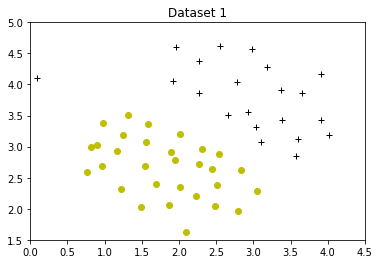

In [17]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()



**A:** [10 pts] In `data1.mat`, most of the positive and negative examples can be separated by a single line. We'll train an SVM with a linear kernel (look at `sklearn.svm.LinearSVC`) with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Add the decision boundary, uncomment the visualization, and verify it in the graph below.

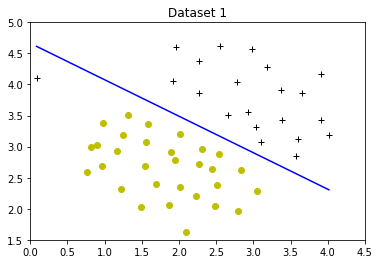

In [20]:
# SOLUTION 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)
C = 1
#X, y = make_classification(n_features=102,random_state=0)
clf = LinearSVC(C=C,random_state=0)
clf.fit(X, y)
### END CODE HERE ### 


plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

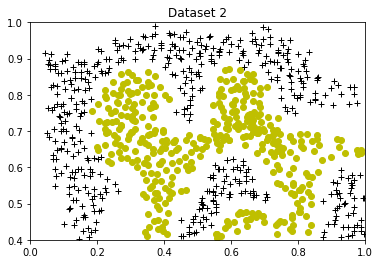

In [21]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** [10 pts] In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel (look at `sklearn.svm.SVC`) to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`. As before, implement the decision boundary, uncomment the visualization, and verify it in the graph below.

/home/scott/Desktop/Machine Learning/hw3/visualize_boundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, levels=[0])


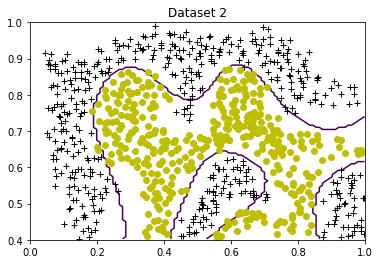

In [22]:
from sklearn.svm import SVC
from visualize_boundary import visualize_boundary
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# SVM Parameters to be used
C = 100
gamma = 10
kernel = 'rbf'

### START CODE HERE ### (approx. 3 lines)
clf = SVC(C=C,gamma=gamma,kernel=kernel)
clf.fit(X, y)
### END CODE HERE ### 

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

Now that we've seen the SKLearn implementation of some different kernels, we'll be working to implement some of our own kernel transformations, but we'll work within the perceptron space. Implement the Kernel Perceptron as described in the lecture using different kernel functions (Linear, Polynomial, and Gaussian RBF). Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

**A:** [20 pts] Implement the kernel functions below:

In [1]:
import numpy as np
import math
from numpy import linalg

def linear_kernel(x1, x2):
    #print(np.dot(x1,x2))
    return np.dot(x1,x2)

def polynomial_kernel(x, y, p = 3,c=1):
    return (np.dot(x,y)+c)**p
    
    
def gaussian_kernel(x, y, sigma = 0.5):
    
    k=np.exp((-np.linalg.norm(x-y)**2)/(2*(sigma**2)))
    return k

In [2]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        
        #WARNING : DO NOT CHANGE THE UNIT TESTS
        #Test the linear kernel
        
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        
        #WARNING : DO NOT CHANGE THE UNIT TESTS
        #Test the polynomial kernel
        
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
         
    def test_gaussian_kernel(self):
        
        #WARNING : DO NOT CHANGE THE UNIT TESTS
        #Test the gaussian kernel
        
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    
tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

**B:** [20 pts] Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [89]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        
        self.kernel = kernel
        self.Niter = Niter # Number of Iterations
        self.support_vector_x = None
        self.support_vector_y = None
        
    def fit(self, X, y):
        '''
        Estimate model parameters i.e the support vectors here and store them in the
        class variable self.support_vector_x and self.support_vector_y
        '''
        #print(X)
        #print(X[0])
        '''
        if self.kernel == linear_kernel:
            print("linear_kernel")
        elif self.kernel == polynomial_kernel:
            print("polynomial_kernel")
        elif self.kernel == gaussian_kernel:
            print("gaussian_kernel")
        else:
            print("error")
        '''
        
        self.alphas=np.zeros(y.size)
        #sv_y_temp==np.zeros(y.size)
        #, dtype=np.float64
        
        k=np.zeros((y.size,y.size))
        for n in range(0,y.size):
            for m in range(0,y.size):
                if self.kernel == linear_kernel:
                    k[n,m]=linear_kernel(X[n],X[m])
                elif self.kernel == polynomial_kernel:
                    k[n,m]=polynomial_kernel(X[n],X[m])
                elif self.kernel == gaussian_kernel:
                    k[n,m]=gaussian_kernel(X[n],X[m])
                    
        for epoch in range(0,self.Niter):
            for i in range(0,y.size):
                sv_y_temp=np.sign(np.sum(k[:,i]*self.alphas*y))
                #print(i, "sytemp=",sv_y_temp, "  support_vector_y=",support_vector_y[i])
                if sv_y_temp != y[i]:
                    self.alphas[i]+=1    
                    
        #print(alphas)
        
        #print("nonzero alphas=",np.count_nonzero(self.alphas))
        
        self.support_vector_x=np.zeros((np.count_nonzero(self.alphas),2))
        self.support_vector_y=np.zeros(np.count_nonzero(self.alphas))
        sv_index=0
        for g in range(0,y.size):
            if self.alphas[g]==1:
                #print("yes")
                #print("X[g,:]=", X[g,:])
                #print("y[g]=", y[g])
                #nzcA.append(a)
                self.support_vector_x[sv_index,:]= X[g,:]
                self.support_vector_y[sv_index]=y[g]
                sv_index+=1

        
        
        #print(self.support_vector_x)
        #print(self.support_vector_y)
    
        #return self.support_vector_x,self.support_vector_y
        
    def predict(self, X):
        '''
        Here X is a set of points. 
        RETURN : 
            y_predict : predicted labels for a set of points X
        '''
        #print(np.size(X))
        #print(np.size(X[:,0])) 

        y_predict=np.zeros(np.size(X[:,0]))
        kpredict=np.zeros((np.size(X[:,0]),np.size(self.support_vector_x[:,0])))
         
        for n in range(0,np.size(X[:,0])):
            for m in range(0,np.size(self.support_vector_x[:,0])):
                if self.kernel == linear_kernel:
                    kpredict[n,m]=linear_kernel(X[n],self.support_vector_x[m])
                    
                elif self.kernel == polynomial_kernel:
                    kpredict[n,m]=polynomial_kernel(X[n],self.support_vector_x[m])
                elif self.kernel == gaussian_kernel:
                    kpredict[n,m]=gaussian_kernel(X[n],self.support_vector_x[m]) 
          
        
        
        if np.size(X[:,0])<np.size(self.support_vector_x[:,0]):
             for i in range(0,np.size(X[:,0])):
                #print(i)
                #y_predict[i]=np.sign(np.sum(kpredict[:,i]*self.support_vector_y[i]))
                #y_predict[i]=np.sign(np.sum(kpredict[:,i]*self.support_vector_y[i]))
                y_predict[i]=np.sign(np.sum(kpredict[:,i]*self.support_vector_y[i]))
                #print(kpredict[i,:])
        else:    
            for i in range(0,np.size(self.support_vector_x[:,0])):
                #print(i)
                y_predict[i]=np.sign(np.sum(kpredict[:,i]*self.support_vector_y[i]))
                #print(kpredict[i,:])
         
        '''                     

        
        for i in range(0,np.size(X[:,0])):
                #y_predict[i]=np.sign(np.sum(kpredict[:,i]*self.support_vector_y[i]))
                sumtemp=0
                for p in range(0,np.size(self.support_vector_x[:,0])):
                   # sumtemp=kpredict[X[i],self.support_vector_x[p]]*self.support_vector_y[p]  
                    #sumtemp=kpredict[X[i],self.support_vector_x[p]]*self.support_vector_y[p]  
                    sumtemp+=self.alphas[p]*self.kernel(X[i],self.support_vector_x[p])*self.support_vector_y[p]
                    
                    
                y_predict[i]=np.sign(sumtemp)
         '''        

                

                
        
        return y_predict

##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [90]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()



#print(data.X_train.shape)
#print(data.y_train.shape)
#print(data.X_test.shape)
#print(data.y_test.shape)



**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

In [91]:
from sklearn.metrics import accuracy_score

kern_L=KernelPerceptron()
kern_L.fit(data.X_train,data.y_train)
y_predL= kern_L.predict(data.X_test)
print("**Linear Kernel** ",(100*accuracy_score(data.y_test, y_predL)),"%")
      

kern_P=KernelPerceptron(polynomial_kernel)
kern_P.fit(data.X_train,data.y_train)
y_predP= kern_P.predict(data.X_test)
print("**Polynomial Kernel** ",(100*accuracy_score(data.y_test, y_predP)),"%") 

kern_G=KernelPerceptron(gaussian_kernel)
kern_G.fit(data.X_train,data.y_train)
y_predG= kern_G.predict(data.X_test)
print("**Gaussian Kernel** ",(100*accuracy_score(data.y_test, y_predG)),"%") 


**Linear Kernel**  46.666666666666664 %
**Polynomial Kernel**  60.0 %
**Gaussian Kernel**  20.0 %


**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 